In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Grid
N = 128
L = 2*np.pi
x = np.linspace(0,2.*np.pi,N,endpoint=False)
alpha = 2.*np.pi/L

kx = np.fft.fftfreq(N)* N * alpha

dt = 1.73/((N/2)**3)

A = 25; B = 16;
u = 3*A**2/np.cosh(0.5*(A*(x+2.)))**2 + 3*B**2/np.cosh(0.5*(B*(x+1)))**2

<IPython.core.display.Javascript object>


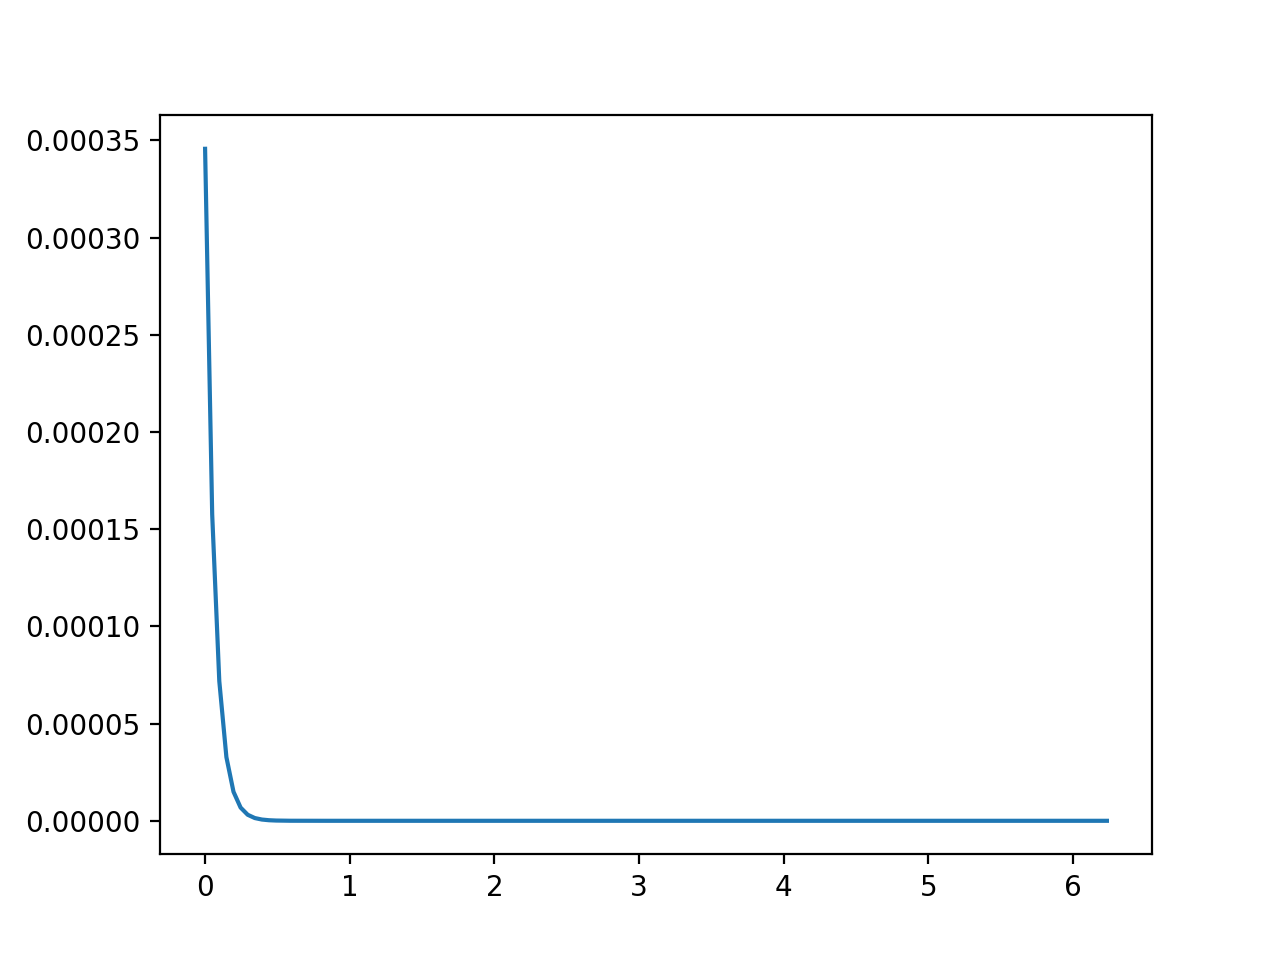

In [3]:
plt.figure()
plt.plot(x,u)

In [5]:
def rhs(u,wavenumber):
    uhat = np.fft.fft(u)
    cov = -u*np.real(np.fft.ifft(1j*wavenumber*uhat))
    vis = np.real(np.fft.ifft(-wavenumber**2*uhat))
    
    return cov + vis

In [17]:
def rk3(u,wavenumber):
    y2 = u + dt*rhs(u,wavenumber)
    y3 = 0.75*u + 0.25*(y2 + dt*rhs(y2,wavenumber))
    u_new = 1./3 * u + 2./3 * (y3 + dt*rhs(y3,wavenumber))
    return u_new

In [9]:
0.1/5.e-6

20000.0

In [27]:
dt = 5.e-6
tFinal = 1.e-4
N = int(tFinal/dt)
u = 3*A**2/np.cosh(0.5*(A*(x+2.)))**2 + 3*B**2/np.cosh(0.5*(B*(x+1)))**2
for n in range(N):
    unew = rk3(u,kx)
    u = unew

In [19]:
u0 = 3*A**2/np.cosh(0.5*(A*(x+2.)))**2 + 3*B**2/np.cosh(0.5*(B*(x+1)))**2

<IPython.core.display.Javascript object>


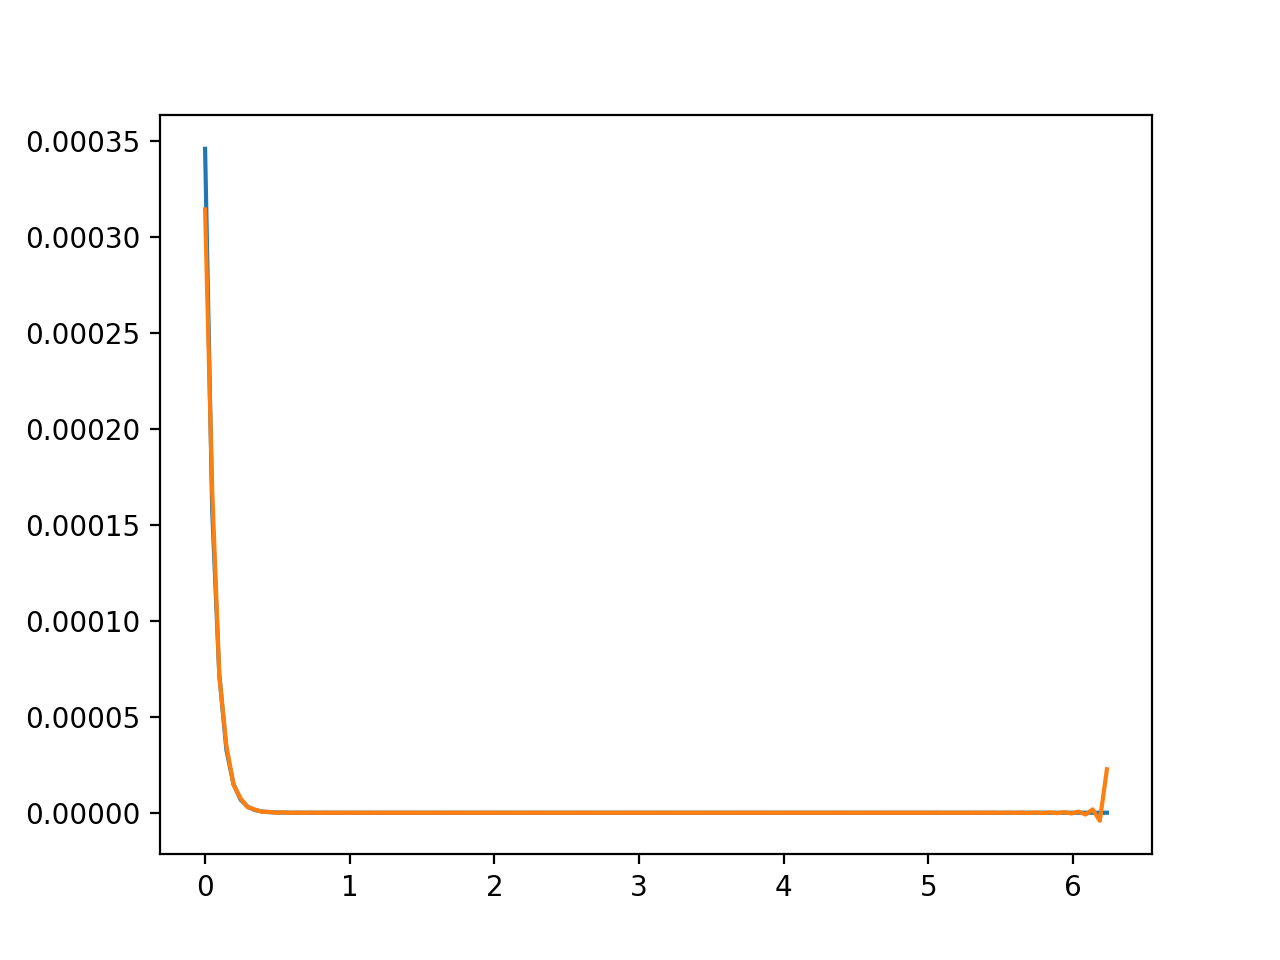

In [28]:
plt.figure()
plt.plot(x,u0)
plt.plot(x,u)